In [1]:
#Imports 
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

In [2]:
#Data is taken from a Kaggle Dataset 
#Import data into data frame (df) and view data .head()
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


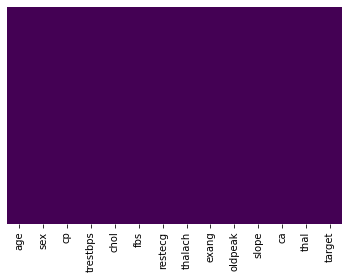

In [5]:
#based on info above does not appear we have any null. Below is quick gut check visual 
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

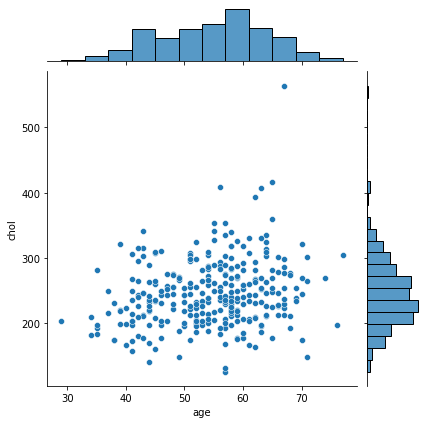

In [6]:
#Start with some data exploration 
sns.jointplot(x='age',y='chol',data=df)

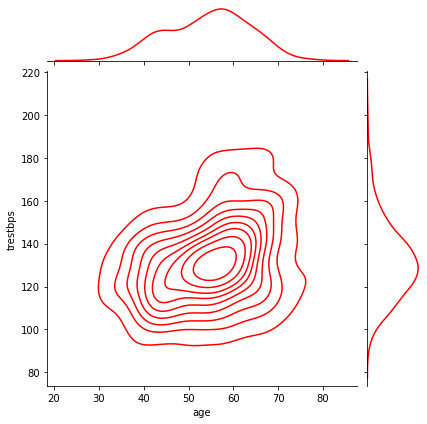

In [7]:
p = sns.jointplot(x='age',y='trestbps',data=df,color='red',kind='kde')
#p.fig.suptitle('Age vs. Resting Blood Pressure')

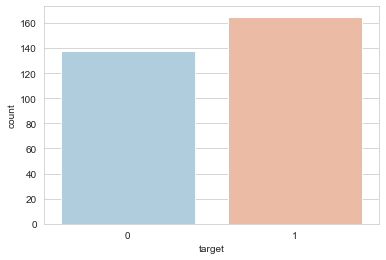

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

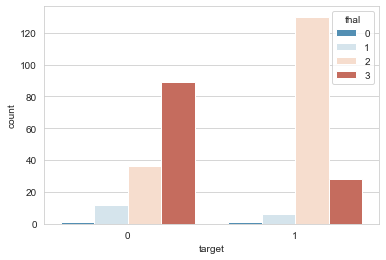

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='target',hue='thal',data=df,palette='RdBu_r')

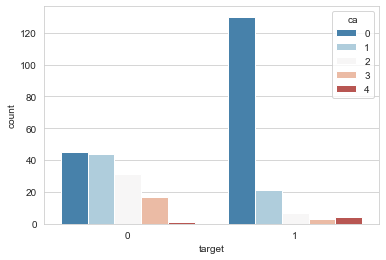

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='target',hue='ca',data=df,palette='RdBu_r')

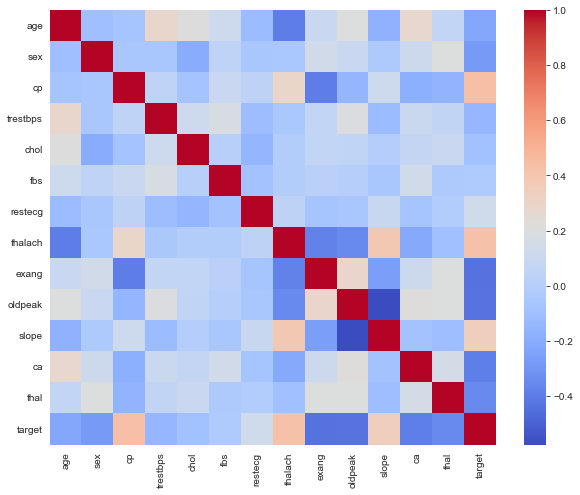

In [11]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm')


Text(0, 0.5, '')

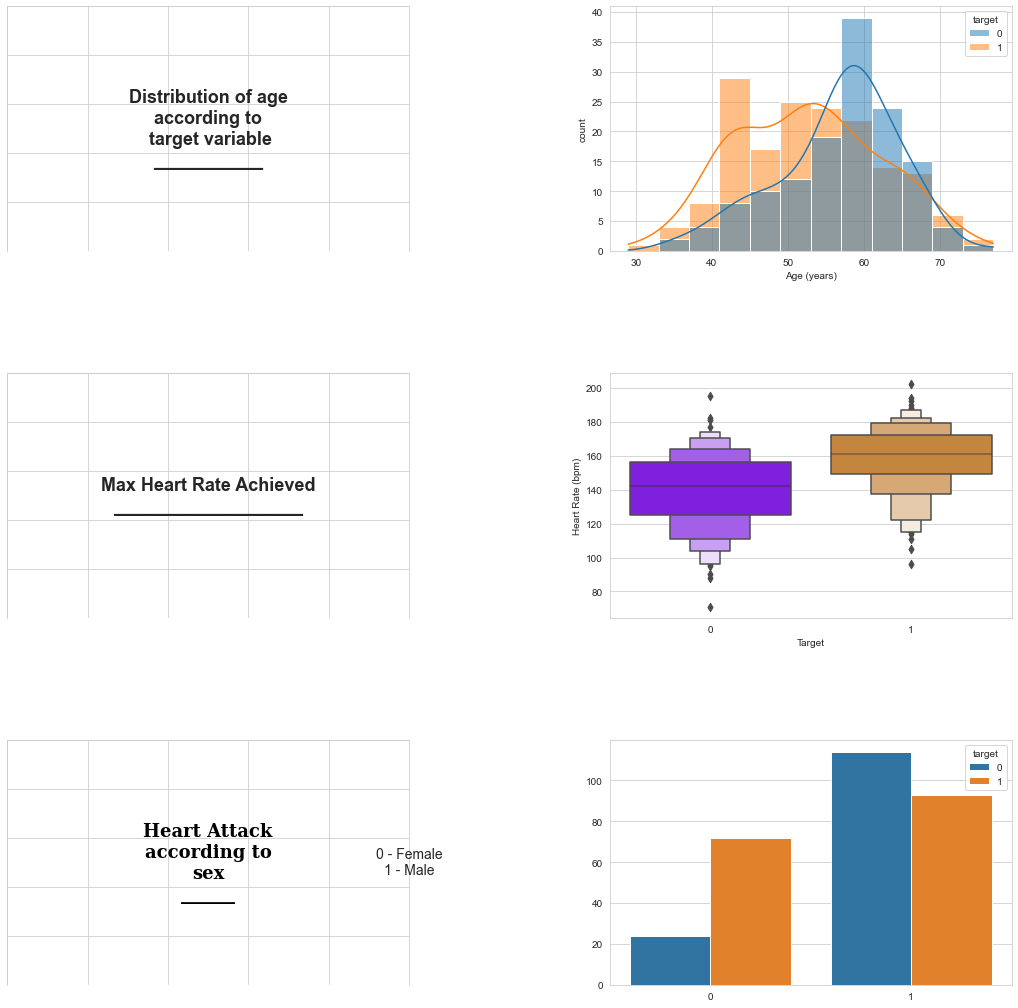

In [21]:
#drop index for plots 
#df = df.reset_index(drop=True,inplace=True)
#Set up 
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(3,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])

#Age graph title
ax0.text(0.5,0.5,"Distribution of age\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

#Age graph 
sns.histplot(ax=ax1,data=df, x='age',hue="target",kde=True)
ax1.set_xlabel('Age (years)')
ax1.set_ylabel('count')
sns.kdeplot()

#Heart Rate
ax2.text(0.5,0.5,"Max Heart Rate Achieved\n___________________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

#Heart Rate
sns.boxenplot(ax=ax3, data=df,x='target',y='thalach',palette=["#8000ff","#da8829"])
ax3.set_xlabel('Target')
ax3.set_ylabel('Heart Rate (bpm)')
sns.kdeplot()

# Sex title
ax4.text(0.5,0.5,"Heart Attack\naccording to\nsex\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.text(1,.5,"0 - Female\n1 - Male",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Sex
sns.countplot(ax=ax5,data=df,x='sex', hue='target')
ax5.set_xlabel("")
ax5.set_ylabel("")

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
#For y just our target, for X let's focus on the attributes with the highest correlation. 
#I compared keeping all attributes vs. only focusing on the top 5, results were similar. Simplistic model is preferred. 
y = df['target']
X = df[['cp','thalach','slope','oldpeak','exang']]
#X = df.drop(['target'],axis=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [16]:
#do not need to scale for logistic regression 

In [17]:
logmodel = LogisticRegression(penalty='l2')
logmodel.fit(X_train,y_train)

C:\Users\brian\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
predictions = logmodel.predict(X_test)

In [24]:
from sklearn.metrics import classification_report
from sklearn import metrics

In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        42
           1       0.86      0.83      0.84        58

    accuracy                           0.82       100
   macro avg       0.81      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
print(confusion_matrix(y_test,predictions))

[[34  8]
 [10 48]]


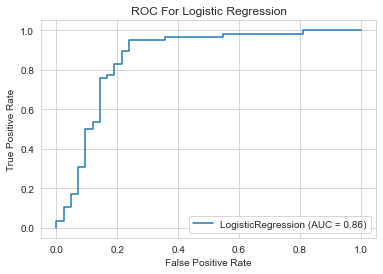

In [30]:
metrics.plot_roc_curve(logmodel, X_test, y_test)
plt.title('ROC For Logistic Regression')
plt.show()

In [ ]:
#meaning of confustion matrix 
#34 heart attacks correct
#8 Heart attacks missed
#10 non-heart attacks thought to be heart attacks 
#48 non-heart attacks correct 